<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-proditorIF/blob/main/Sep8-9/Tarea_9sep_McL_BRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning/ Alma
### Tarea 08/09/2023 uso de Scikit-learn y keras

1. Reproducir los ejemplos mostrados en https://github.com/DCI-alxogm/ML2023/blob/main/Sep8-9/LR_SKLearn_keras.ipynb  respecto al uso de scikit-learn y keras.
2. Usar el método de gradiente descendiente para modelar un conjunto de datos de su elección, hacerlo usando las librerias de sckit-learn y keras, comparar resultados.

In [2]:
# Se importan las librerias necesarias
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor #Método de gradiente decendiente
from sklearn.preprocessing import StandardScaler #Normaliza los datos
from sklearn.model_selection import train_test_split #Permite separar eñ conjunto de datos en uno de entrenamiento y uno de validación
import pandas as pd

### 1. Ejemplos

Mounted at /content/drive


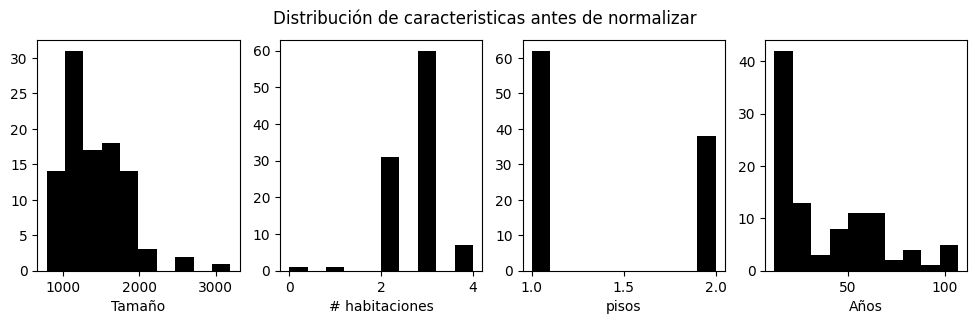

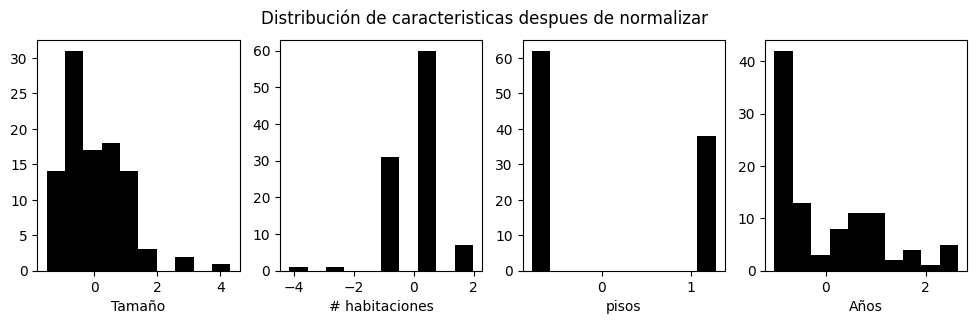

In [3]:
# se cargan los datos
drive.mount('/content/drive')
file ="/content/drive/MyDrive/Machine_Learn/houses.txt"
datah=np.loadtxt(file,delimiter=",")
param=datah[:,:4]
hcost=datah[:,4]
labels=["Tamaño","# habitaciones","pisos","Años"]
# Se normalizan los datos
paramN = StandardScaler().fit_transform(param)
#Se grafican los datos
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(param[:,i],color="black")
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas antes de normalizar ")
plt.show()
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(paramN[:,i],color="black")
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas despues de normalizar ")
plt.show()

In [4]:
#SDGRegressor establece el número de itreaciones, el comportamiento del parámetro de aprendizaje y su valor
Grad = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
#El atributo fit establece los datos a los que les sera aplicada la regresión con los valores establecidos
Grad.fit(paramN, hcost)
#El atributo .n_iter_ nos da el número de ieraciones que el método empleo
# El atributo .t_ nos da el número de actualizaciones
print(f"Número de iteraciones: {Grad.n_iter_}, numero de actualizaciones de peso W: {Grad.t_}")
# Se extraen los pesos
w0 = Grad.intercept_
w= Grad.coef_
print(f"\nParámetros de peso W:  w0: {w0}, wi:{w}")

Número de iteraciones: 33, numero de actualizaciones de peso W: 3301.0

Parámetros de peso W:  w0: [362.63845316], wi:[110.46029814 -21.8927485  -33.06916201 -37.52053365]


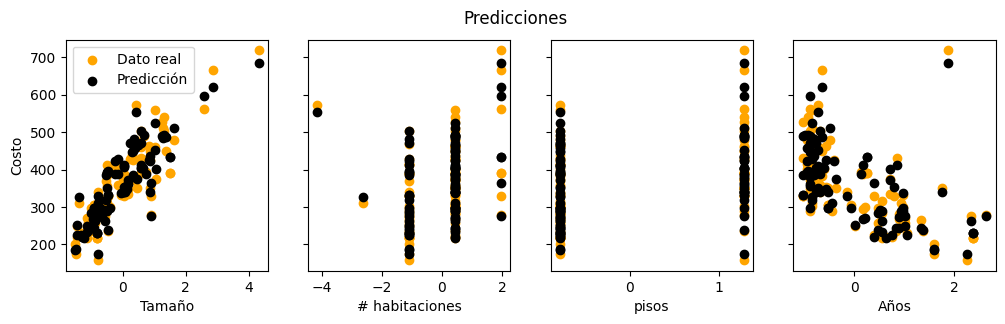

In [5]:
# Predicciones
#Se genera el modelo de predicción con los pesos obtenidos
yp = w0[0]
for i in range(len(w)):
  yp+=w[i]*paramN[:,i]
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(paramN[:,i],hcost,color="orange", label = 'Dato real')
    ax[i].scatter(paramN[:,i],yp,color="black", label = 'Predicción')
    ax[i].set_xlabel(labels[i])

ax[0].set_ylabel("Costo"); ax[0].legend();
fig.suptitle("Predicciones")
plt.show()

In [6]:
#Ahora se emplea la función train_test_split para dividir el conjunto de datos en un grupo de entrenamiento y un grupo de validación
Ptr, Pts, hctr, hcts = train_test_split(paramN, hcost, test_size=0.75, random_state=25)
#test_size determina el tamaño del conjunto de validación siendo el 25% del conjunto total
Grad1= SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
#loss establece el tipo de función error y squared_error hace refrencia al error cuadrático
#penalty establece que no se penaliza por sobre-ajuste
Grad1.fit(Ptr, hctr)
print(f"Número de iteraciones: {Grad1.n_iter_}, numero de actualizaciones de peso W: {Grad1.t_}")
# Se extraen los parámetros
w01 = Grad1.intercept_
w1 = Grad1.coef_
print(f"Parámetros de peso:  w0 {w01}, wi:{w1}")
#Permite probar el grado de ajuste del modelo
print("Score",Grad.score(Ptr,hctr))

Número de iteraciones: 93, numero de actualizaciones de peso W: 2326.0
Parámetros de peso:  w0 [369.32399804], wi:[104.07641495 -21.40715586 -23.93996144 -49.36839036]
Score 0.9753741991582237


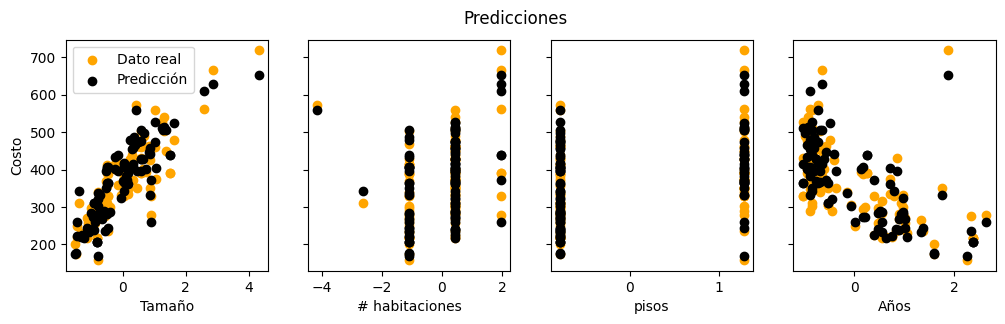

In [7]:
# Predicciones con un conjunto de entrenamiento del 85%
#Se genera el modelo de predicción con los pesos obtenidos
yp1= w01[0]
for i in range(len(w)):
  yp1+=w1[i]*paramN[:,i]
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(paramN[:,i],hcost,color="orange", label = 'Dato real')
    ax[i].scatter(paramN[:,i],yp1,color="black", label = 'Predicción')
    ax[i].set_xlabel(labels[i])

ax[0].set_ylabel("Costo"); ax[0].legend();
fig.suptitle("Predicciones")
plt.show()

### Usando Keras

In [8]:
#Usando KERAS
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
# Se establece una semilla
np.random.seed(2)
model = Sequential() #1se declara el modelo
# Se le añade el moedelo secuencial el número de datos de salida, el número de datos de entrada (parámetros) y al final se declara el tipo de modelo
model.add(Dense(1, input_dim= 4, activation='linear'))
#Se establece el valor de a
sgd = SGD(learning_rate=0.01)
# Se compila el modelo y se establece el tipo de función error y el tipo de optimización  a SGD
model.compile(loss='mse', optimizer=sgd)
#Se imprime la información del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
#Número de datos
num_epochs = 100
# Se establece el tamaños de los sub grupos
batch_size =Ptr.shape[0] #30
# Se aplica el modelo
history = model.fit(Ptr, hctr, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 478ms/step - loss: 135903.8750
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 130058.8203
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 124512.6172
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 119247.5000
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 114246.8984
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 109495.3438
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 104978.3438
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 100682.4297
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 96594.9531
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 92704.0781
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 88998.7812
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 85468.67

In [10]:
# Se extrae la información de las capas en este caso solo se tiene una capa
capas = model.layers[0]
# Se extraen los pesos
w, w0 = capas.get_weights()
print(f"Pesos Wi={w}  \nW0={w0}")

Pesos Wi=[[ 41.53341 ]
 [-24.10808 ]
 [-36.100277]
 [-73.06263 ]]  
W0=[296.37357]


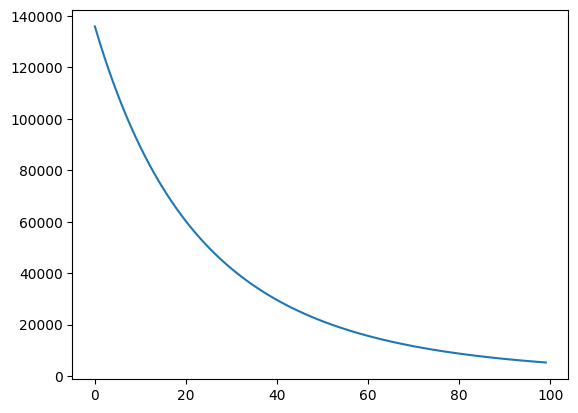

In [14]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [15]:
history2= model.fit(Ptr, hctr, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 18ms/step - loss: 5166.4482
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 5039.1318
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 4915.5981
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 4795.7188
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 4679.3755
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 4566.4541
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 4456.8413
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 4350.4282
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 4247.1138
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 4146.7983
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 4049.3816
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 3954.7722
Epoch 13/100
1/1 

2- Base de datos sobre partículas.\

Los parámetros son Masa (GeV/c²),Velocidad (c),Carga (e),Magnetización y la variable dependiente sera la energía (GeV).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


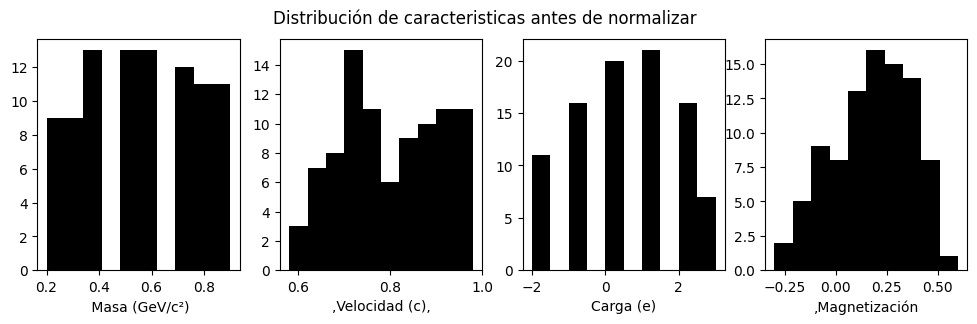

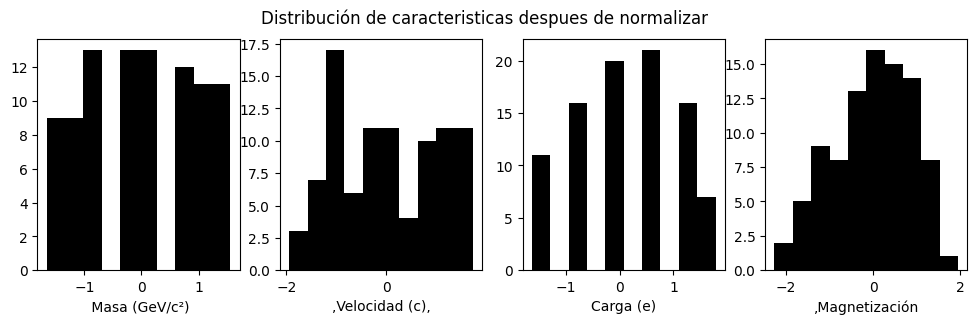

In [18]:
drive.mount('/content/drive')
file ="/content/drive/MyDrive/Machine_Learn/datos_fic_part.txt"
datah=np.loadtxt(file,delimiter=",")
part=datah[:,:4]
E=datah[:,4]
labels=[" Masa (GeV/c²)",",Velocidad (c),","Carga (e)",",Magnetización"]
# Se normalizan los datos
partN= StandardScaler().fit_transform(part)
#Se grafican los datos
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(part[:,i],color="black")
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas antes de normalizar ")
plt.show()
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(partN[:,i],color="black")
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas despues de normalizar ")
plt.show()

Número de iteraciones: 15, numero de actualizaciones de peso W: 1366.0

Parámetros de peso W:  w0: [2.23062763], wi:[ 0.09706339  0.01932304  0.19880203 -0.05194604]
Score: -0.2856453331930804


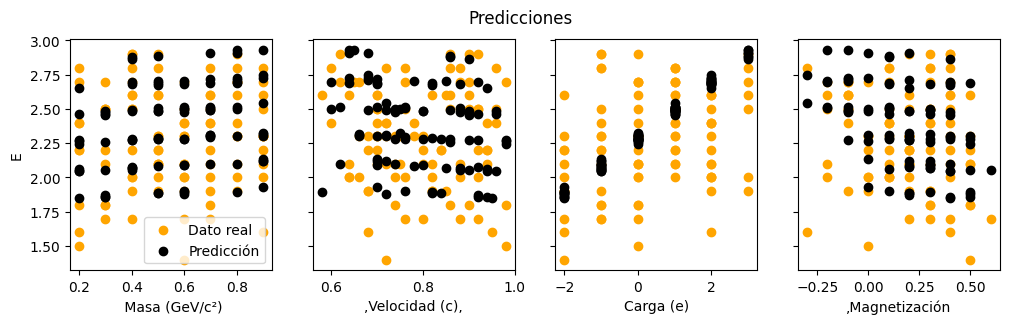

In [91]:
#Usando SkLearn
Gradp = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.05)
Gradp.fit(partN, E)
print(f"Número de iteraciones: {Gradp.n_iter_}, numero de actualizaciones de peso W: {Gradp.t_}")
w0 = Gradp.intercept_
w= Gradp.coef_
print(f"\nParámetros de peso W:  w0: {w0}, wi:{w}")
# Predicciones
Predp = w0[0]
for i in range(len(w)):
  Predp+=w[i]*part[:,i]
print("Score:",Gradp.score(part,E))
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(part[:,i],E,color="orange", label = 'Dato real')
    ax[i].scatter(part[:,i],Predp,color="black", label = 'Predicción')
    ax[i].set_xlabel(labels[i])

ax[0].set_ylabel("E"); ax[0].legend();
fig.suptitle("Predicciones")
plt.show()


In [97]:
#Usando Keras
np.random.seed(2)
modpart = Sequential()
modpart.add(Dense(1, input_dim= 4, activation='linear'))
sgd = SGD(learning_rate=0.1)
model.compile(loss='mse', optimizer=sgd)
num = 100
size =part.shape[0]
apl = model.fit(partN, E, epochs=num, batch_size=size)
capas = modpart.layers[0]
w, b = capas.get_weights()
W =np.hstack(w)

Epoch 1/100
1/1 [==============================] - 0s 260ms/step - loss: 1110.8118
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 1057.0658
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 1013.4418
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 976.6462
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 944.5380
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 915.7192
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 889.2718
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 864.5885
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 841.2644
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 819.0266
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 797.6892
Epoch 12/100
1/1 [==============================] - 0s 11ms/step - loss: 777.1229
Epoch 13/100
1/1 [====

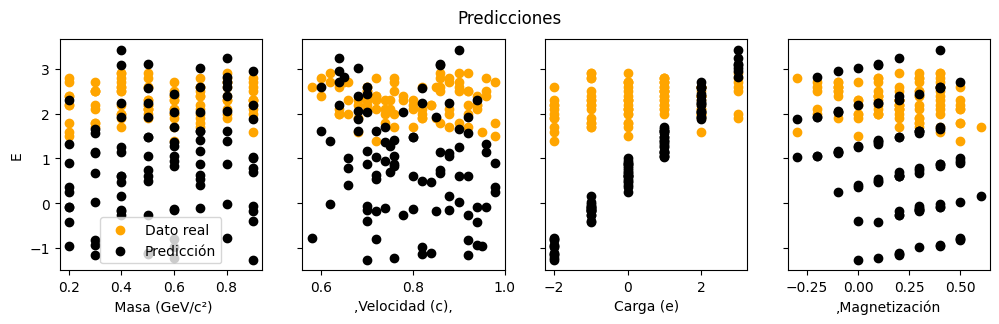

In [98]:
# Predicciones
Predp1 = b[0]
for i in range(len(w)):
  Predp1+=W[i]*part[:,i]
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(part[:,i],E,color="orange", label = 'Dato real')
    ax[i].scatter(part[:,i],Predp1,color="black", label = 'Predicción')
    ax[i].set_xlabel(labels[i])

ax[0].set_ylabel("E"); ax[0].legend();
fig.suptitle("Predicciones")
plt.show()